<a href="https://colab.research.google.com/github/djswoosh/Uni-Bits/blob/main/Apriori_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt

In [22]:
## Use this to read data directly from github
df = pd.read_csv('https://gist.githubusercontent.com/Harsh-Git-Hub/2979ec48043928ad9033d8469928e751/raw/72de943e040b8bd0d087624b154d41b2ba9d9b60/retail_dataset.csv', sep=',')

In [23]:
items = (df['0'].unique())
items

array(['Bread', 'Cheese', 'Meat', 'Eggs', 'Wine', 'Bagel', 'Pencil',
       'Diaper', 'Milk'], dtype=object)

In [24]:

#Data Preprocessing

#OneHotEncoding

itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

In [27]:
freq_items = apriori(ohe_df, min_support=0.2, use_colnames=True, n_jobs=1,)
freq_items.head(7)

,support,itemsets
0,0.501587,(Milk)
1,0.425397,(Bagel)
2,0.438095,(Eggs)
3,0.406349,(Diaper)
4,0.504762,(Bread)
5,0.476190,(Meat)
6,0.501587,(Cheese)


In [28]:
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Cheese),(Milk),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
1,(Milk),(Cheese),0.501587,0.501587,0.304762,0.607595,1.211344,0.053172,1.270148
2,(Bagel),(Bread),0.425397,0.504762,0.279365,0.656716,1.301042,0.064641,1.442650
3,(Eggs),(Meat),0.438095,0.476190,0.266667,0.608696,1.278261,0.058050,1.338624
4,(Eggs),(Cheese),0.438095,0.501587,0.298413,0.681159,1.358008,0.078670,1.563203


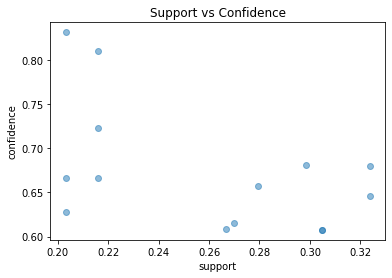

In [37]:
#SupportVsConfidence

plt.scatter(rules['support'], rules['confidence'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs Confidence')
plt.show()

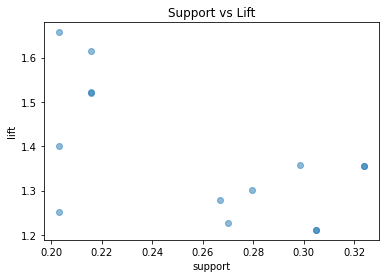

In [38]:
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.show()

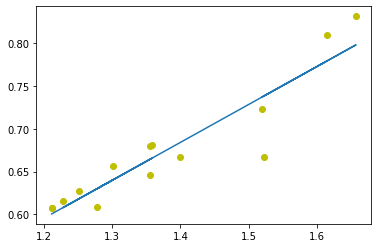

In [39]:
#liftvsConfidence

fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], 
 fit_fn(rules['lift']))